# Playground
Toy Datasets to get back into the swing of things.

## Imports

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Load and Explore the data

In [23]:
#Load data
from sklearn import datasets

iris_data = datasets.load_iris(as_frame=True).frame
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [25]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [26]:
iris_data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

Though it might be clear based on the feature names, which would correlate (sepal features and petal features), I want to treat this data as if we need to prove any assumptions.

I'm going to use a correlation matrix to examine each features relationship to the others. This functionality is built into the Pandas library.

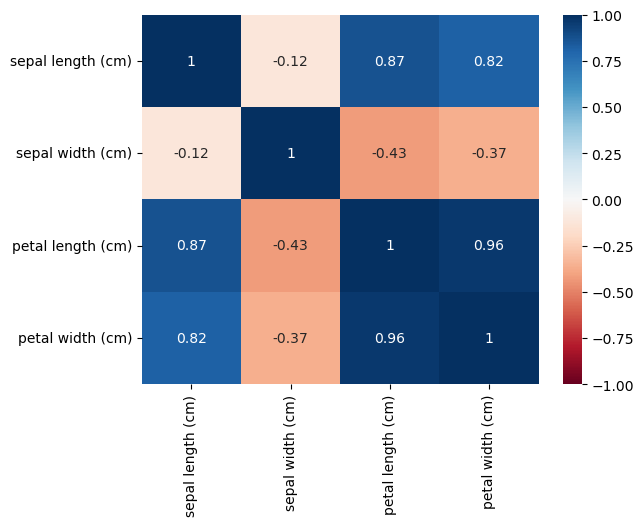

In [27]:
#Excluding the target column from this correlation matrix
corr_matrix = iris_data.iloc[:,:-1].corr()
sn.heatmap(corr_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.show()

With a heatmap, we can see features correlation with eachother with the strength of the correlation being measured by a value closest to 1 (or -1 if negatively correlated) with the values exactly at 1 being the relationship with itself. 

From this heatmap we can see that there is a strong correlation between sepal length and both petal features is pretty strong but surprisingly the correlation with sepal width is weakly negative.

The correlation defines the slope in the relationship between the two features, upward if positive and downward if negative, getting more linear as it gets closer to 1 or -1.

This means that the data varies a lot between sepal's length and width, one not able to reliably inform a relationship with the other.

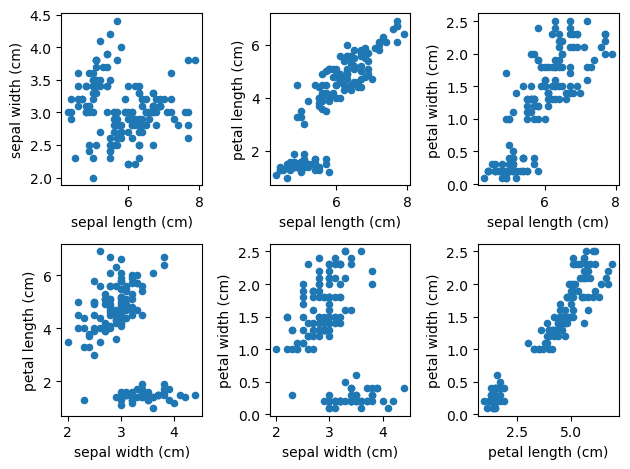

In [28]:
#Taking a look at the raw data
fig, axs = plt.subplots(2,3)
iris_data.plot.scatter(ax=axs[0,0], x='sepal length (cm)', y='sepal width (cm)')
iris_data.plot.scatter(ax=axs[0,1], x='sepal length (cm)', y='petal length (cm)')
iris_data.plot.scatter(ax=axs[0,2], x='sepal length (cm)', y='petal width (cm)')
iris_data.plot.scatter(ax=axs[1,0], x='sepal width (cm)', y='petal length (cm)')
iris_data.plot.scatter(ax=axs[1,1], x='sepal width (cm)', y='petal width (cm)')
iris_data.plot.scatter(ax=axs[1,2], x='petal length (cm)', y='petal width (cm)')
fig.tight_layout()

We're able to get a better look at these relationships with graphs. You can see that the correlations closer to 1 are grouped more closely with a clear upward linear slope. 

It's important to remember though that correlation does not equal causation, just because two features have a strong correlation does not mean that one directly affects the other.

"It often happens that two features that were meant to measure different characteristics are influenced by some common mechanism and tend to vary together" - [Princeton](https://www.cs.princeton.edu/courses/archive/fall08/cos436/Duda/PR_lims/cor_feat.htm#:~:text=It%20often%20happens%20that%20two,and%20tend%20to%20vary%20together.)

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

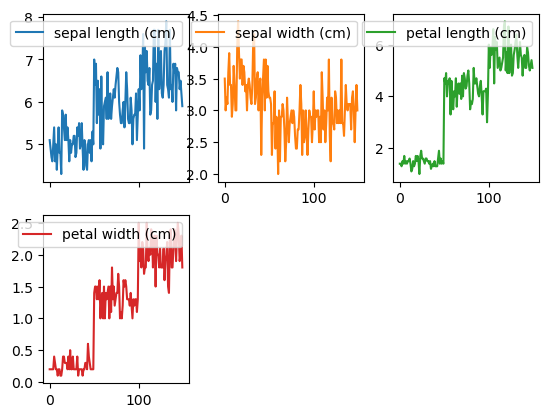

In [30]:
iris_data.iloc[:,:-1].plot(subplots=True, layout=(2,3))

# What next? 

Without a clear question of purpose when diving into the data, we have a case of self exploration.

When it comes to a collection of features that can be used to describe the identity of samples.. It seems to best first step would be to use a classification model.

I think the the choice is between:

Logistic Regression  
K-nearest neighbors (Because we have a known value for k)  
or  
Support Vector Machines

In [ ]:
from sklearn.model_selection import train_test_split

#Split full dataset into data and targets
X = iris_data.iloc[:,:-1]
y = iris_data.iloc[:,-1]

#Split into training and testing sets
'''X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=64)
print(X_train.shape, y_train.shape)
wprint(X_test.shape, y_test.shape)'''

'X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=64)\nprint(X_train.shape, y_train.shape)\nprint(X_test.shape, y_test.shape)'

# Cross Validation
In order to find the best split of our data for training and testing, we're going to use cross validation. 
https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1, random_state=64)
scores = cross_val_score(clf, X, y, cv=10) #10 k-fold is commonly used
print(scores)

[1.         0.93333333 1.         1.         0.86666667 1.
 0.93333333 1.         1.         1.        ]
